## DATA ANALYSIS PYTHON PROJECT - CUSTOMERS CHURN ANALYSIS

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load CSV File

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\Customer Churn.csv", encoding= 'latin1')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Inspection of Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [6]:
df['TotalCharges'] = df['TotalCharges'].replace(" ",'0')
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Checking NULL Values

In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#### Check Duplicate values

In [10]:
df.duplicated().sum()

np.int64(0)

#### Check duplicate values using Unique keys or Primary Keys

In [11]:
df["customerID"].duplicated().sum()

np.int64(0)

#### Coverted 0 and 1 value of senior citizen to yes/no to make it easier to understand

In [12]:
def convo(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(convo)

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Create a count plot to show the number of customers who churned vs. those who didn't

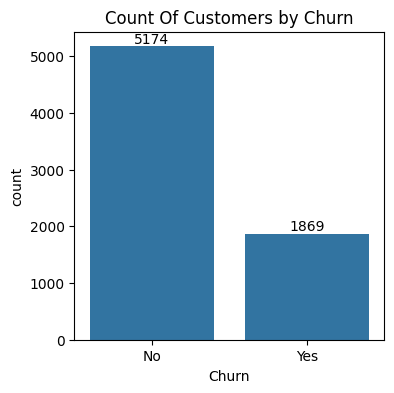

In [14]:
plt.figure(figsize=(4,4))
a = sns.countplot(x = 'Churn' , data = df)

a.bar_label(a.containers[0])
plt.title("Count Of Customers by Churn")
plt.show()

#### What is the percentage of customers who have churned versus those who haven't? Can we show it using a pie chart?

In [15]:
churn_counts = df['Churn'].value_counts()
print(churn_counts)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


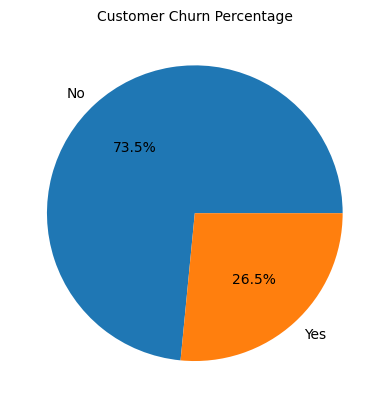

In [51]:
plt.pie(churn_counts,
        labels=churn_counts.index,
        autopct='%.1f%%')
plt.title("Customer Churn Percentage", fontsize = 10)
plt.show()

#### Is there any difference in churn rate between male and female customers? Show it using a count plot

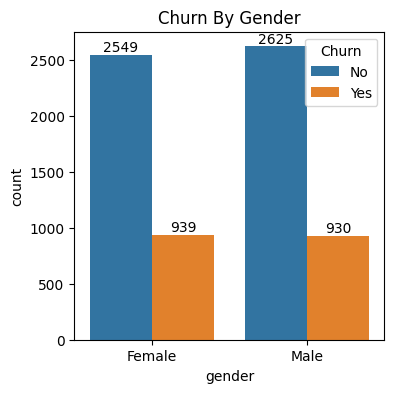

In [17]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = 'gender', data=df,hue = 'Churn')

for i in ax.containers:
    ax.bar_label(i)

plt.title("Churn By Gender")
plt.show()

#### How many customers are senior citizens and how many are not? Show the count using a bar chart

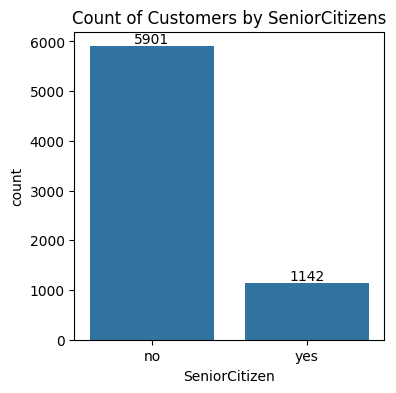

In [52]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'SeniorCitizen', data = df)

ax.bar_label(ax.containers[0])

plt.title("Count of Customers by SeniorCitizens")
plt.show()

#### What is the percentage distribution of churn among senior and non-senior citizens? Show it using a stacked bar chart

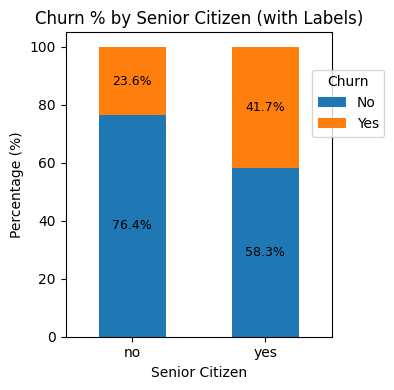

In [34]:
#Group data seniorcitizen and churn , calculate percentage
churn_pct = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize = True).unstack()*100

#Normalize gives percentage instead of count
#unstack gives yes n no in seperated column

#Create the stacked bar chart
ax = churn_pct.plot(kind = 'bar',stacked= True, figsize=(4,4))

#Add percentage label to each bar segment
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    
    x,y = p.get_xy()  #botttom-left coordinate of the bar
    ax.text(x + width / 2, y + height / 2,
           f'{height:.1f}%',
           ha = 'center' , va = 'center', fontsize = 9)

#Customize the chart
plt.title("Churn % by Senior Citizen (with Labels)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))
plt.tight_layout()

#### How is customer churn distributed over different tenure periods? Show using a histogram

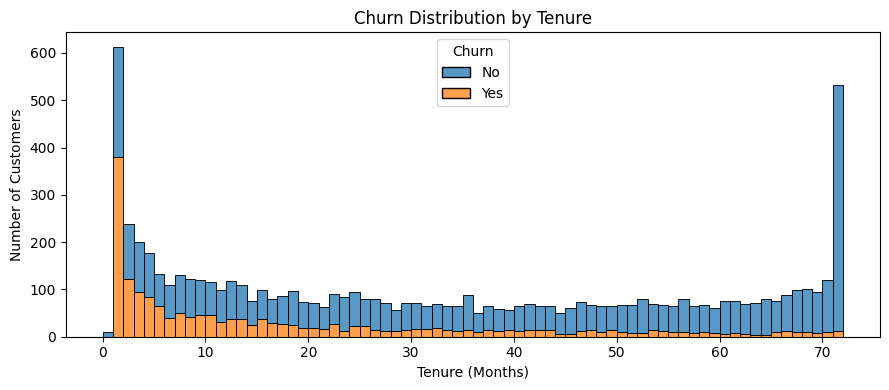

In [54]:
#Set figure size
plt.figure(figsize = (9,4))

#Create histogram by tenure, colored by churn
sns.histplot(
    x = 'tenure',
    data = df,
    bins = 72,
    hue = 'Churn',
    multiple = 'stack')

plt.title("Churn Distribution by Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")

plt.tight_layout()
plt.show()

#### Count Of customers by contract

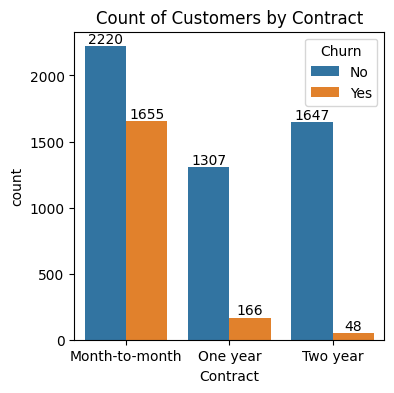

In [44]:
plt.figure(figsize = (4,4))

ax = sns.countplot(x ='Contract', data=df, hue='Churn')

for a in ax.containers:
    ax.bar_label(a)

plt.title("Count of Customers by Contract")
plt.show()

#### Customers by Payment Method

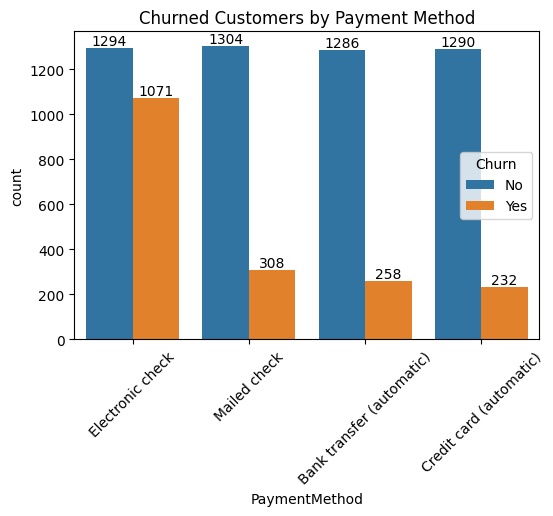

In [45]:
plt.figure(figsize = (6,4))

ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

### End Of The Project